# Raster Data 1: Hypsometric Curve

In [1]:
import numpy as np
import rasterio as rio
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import pygeohydro as gh
#from pygeohydro import helpers
import cartopy

elev_fname = '../data/ubrb_dem_30m.tif'
lulc_fname = '../data/upper_boise_landcover_30m.tif'

In [2]:
elev_data = rio.open(elev_fname)
elev_array = elev_data.read(1)
elev_array.shape

(3239, 5433)

In [3]:
lulc_data = rio.open(lulc_fname)
lulc_array = lulc_data.read(1)
lulc_array.shape

(3239, 5433)

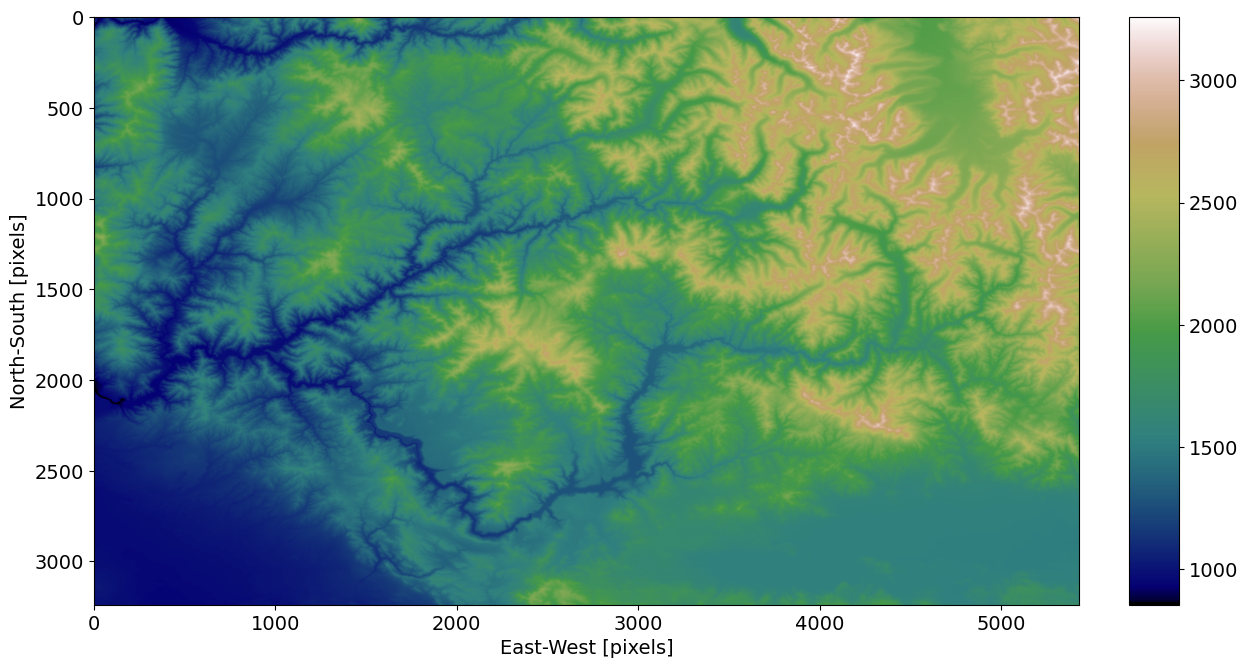

In [4]:
plt.rcParams.update({'font.size': 14})

fig, ax = plt.subplots(figsize = (14,8))
im = ax.imshow(elev_array,cmap='gist_earth')
ax.set_xlabel('East-West [pixels]')
ax.set_ylabel('North-South [pixels]')
divider = make_axes_locatable(ax)
cax = divider.new_horizontal(size = '5%', pad = 0.5, pack_start = False)
fig.add_axes(cax)
fig.colorbar(mappable=im, cax=cax)

plt.show()

In [5]:
zmin = elev_array.min()
zmax = elev_array.max()
zmean = elev_array.mean()

zstats = f'''
Elevation Statistics:
Minimum elevation: {zmin:.{2}f} m
Maximum elevation: {zmax:.{2}f} m
Mean elevation: {zmean:.{2}f} m
'''

print(zstats)


Elevation Statistics:
Minimum elevation: 853.23 m
Maximum elevation: 3259.66 m
Mean elevation: 1797.45 m



In [ ]:
# Get NLCD colormap using pygeohydro tool stack 
cmap, norm, levels = gh.plot.cover_legends()

fig, ax = plt.subplots(figsize = (14,8))
im = ax.imshow(np.flipud(lulc_array),cmap=cmap)
ax.set_xlabel('East-West [pixels]')
ax.set_ylabel('North-South [pixels]')
divider = make_axes_locatable(ax)
cax = divider.new_horizontal(size = '5%', pad = 0.5, pack_start = False)
fig.add_axes(cax)
fig.colorbar(mappable=im, cax=cax)

plt.show()

In [ ]:
zhist, zbins = np.histogram(elev_array, bins=25)
zbin_center = (zbins[:-1] + zbins[1:])/2
zfrac = zhist/zhist.sum()

In [ ]:
plt.figure(figsize=(10,8))
plt.bar(zbin_center,zfrac,width=1.0*(zbin_center[1]-zbin_center[0]))
plt.title('Upper Boise River Basin Elevation Distribution')
plt.xlabel('Elevation [m]')
plt.ylabel('Frequency [-]')
plt.grid('on')
plt.show()

In [ ]:
plt.figure(figsize=(10,8))
plt.bar(zbin_center,zfrac.cumsum(),width=1.0*(zbin_center[1]-zbin_center[0]))
plt.title('Upper Boise River Basin Cumulative Elevation Distribution')
plt.xlabel('Elevation [m]')
plt.ylabel('Cumulative Proportion [-]')
plt.grid('on')
plt.show()

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(zfrac.cumsum(),zbin_center)
plt.xticks(np.arange(0.0, 1.1, 0.1))
plt.yticks(np.arange(1000,3500,250))
plt.title('Upper Boise River Basin Hypsometric Curve')
plt.xlabel('Proportion Below Elevation [-]')
plt.ylabel('Elevation [m]')
plt.grid('on')
plt.show()

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(1.0 - zfrac.cumsum(),zbin_center)
plt.xticks(np.arange(0.0, 1.1, 0.1))
plt.yticks(np.arange(1000,3500,250))
plt.title('Upper Boise River Basin Hypsometric Curve')
plt.xlabel('Proportion Above Elevation [-]')
plt.ylabel('Elevation [m]')
plt.grid('on')
plt.show()